In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [6]:
#Q2-Get first 2 rows of data
pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv').head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [7]:
#Q3-Check if there is missing value
pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv').isnull().sum()

,0
Carat Weight,0
Cut,0
Color,0
Clarity,0
Polish,0
Symmetry,0
Report,0
Price,0


In [8]:
#Q4- Get data information and number of rows and columns
pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv').shape

(6000, 8)

In [9]:
#Q5-Get descriptive statistics of data
pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv').describe(include='all')

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


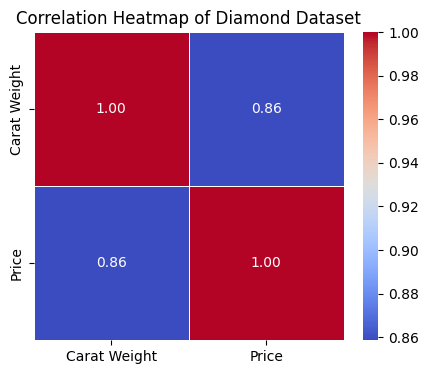

In [10]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Diamond Dataset')
plt.show()

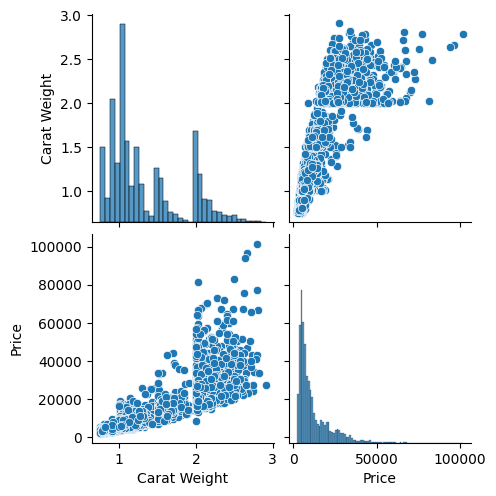

In [11]:
#Q7-Use seasoborns paiplot to generate following  diagram
df.head()
sns.pairplot(df)
plt.show()

In [12]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
df.head()
X = df.drop('Price', axis=1)
Y = df['Price']
print(X.head())
print(Y.head())


   Carat Weight    Cut Color Clarity Polish Symmetry Report
0          1.10  Ideal     H     SI1     VG       EX    GIA
1          0.83  Ideal     H     VS1     ID       ID   AGSL
2          0.85  Ideal     H     SI1     EX       EX    GIA
3          0.91  Ideal     E     SI1     VG       VG    GIA
4          0.83  Ideal     G     SI1     EX       EX    GIA
0    5169
1    3470
2    3183
3    4370
4    3171
Name: Price, dtype: int64


In [13]:
#Q9-Create dummy for the input variables (X)
df.head()
pd.get_dummies(X)
print(X.head())


   Carat Weight    Cut Color Clarity Polish Symmetry Report
0          1.10  Ideal     H     SI1     VG       EX    GIA
1          0.83  Ideal     H     VS1     ID       ID   AGSL
2          0.85  Ideal     H     SI1     EX       EX    GIA
3          0.91  Ideal     E     SI1     VG       VG    GIA
4          0.83  Ideal     G     SI1     EX       EX    GIA


In [2]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

X = df.drop('Price', axis=1)
Y = df['Price']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4800, 29)
X_test shape: (1200, 29)
y_train shape: (4800,)
y_test shape: (1200,)


In [5]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np # Import numpy as np, which was missing before

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')


X = df.drop('Price', axis=1)
Y = df['Price']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

def evalmetric(y, ypred):
    e = y - ypred
    mse_f = np.mean(e**2) # Now np.mean and np.sqrt are available
    rmse_f = np.sqrt(mse_f)
    mae_f = np.mean(abs(e))
    mape_f = 100 * np.mean(abs(e / y))
    r2_f = 1 - (sum(e**2) / sum((y - np.mean(y))**2))
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)
    print("MAE:", mae_f)
    print("MAPE:", mape_f)
    print("R-Squared:", r2_f)

print("Test Data Evaluation:")
evalmetric(y_test, y_pred_test)
print("\nTrain Data Evaluation:")
evalmetric(y_train, y_pred_train)

Test Data Evaluation:
MSE: 16395263.35943688
RMSE: 4049.1064890216066
MAE: 2386.881758705482
MAPE: 27.9843246727865
R-Squared: 0.8461544250476121

Train Data Evaluation:
MSE: 13617878.611029437
RMSE: 3690.240996334716
MAE: 2420.3923973752344
MAPE: 28.43621397414528
R-Squared: 0.8677546171602638


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

Test Data Evaluation:
 MSE: 14045395.600388976
 RMSE: 3747.718727495542
 MAE: 2512.543391143228
 MAPE: 41.28569490814738
 R-Squared: 0.9196226560309768


 Train Data Evaluation:
 MSE: 13828166.013262411
 RMSE: 3718.624230840199
 MAE: 2482.1962982918047
 MAPE: 40.29538676569882
 R-Squared: 0.9202702949806735


In [1]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Lasso

In [15]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

X = df.drop('Price', axis=1)
Y = df['Price']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)


y_pred_test = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)


def evalmetric(y, ypred):
    e = y - ypred
    mse_f = np.mean(e**2)
    rmse_f = np.sqrt(mse_f)
    mae_f = np.mean(abs(e))
    mape_f = 100 * np.mean(abs(e / y))
    r2_f = 1 - (sum(e**2) / sum((y - np.mean(y))**2))
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)
    print("MAE:", mae_f)
    print("MAPE:", mape_f)
    print("R-Squared:", r2_f)


print("Test Data Evaluation (Ridge):")
evalmetric(y_test, y_pred_test)
print("\nTrain Data Evaluation (Ridge):")
evalmetric(y_train, y_pred_train)

Test Data Evaluation (Ridge):
MSE: 16386346.26392039
RMSE: 4048.0052203425316
MAE: 2389.45222000256
MAPE: 28.022200369524814
R-Squared: 0.8462380989512615

Train Data Evaluation (Ridge):
MSE: 13646548.843169976
RMSE: 3694.1235554824066
MAE: 2422.9559862611777
MAPE: 28.470060203328458
R-Squared: 0.8674761959807372


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? **bold text**

Ridge regression, with alpha=1, provided virtually no improvement over standard linear regression in this specific case. The changes in metrics were negligible.
*   Ridge regression did not overfit the data, but also did not significantly improve it.
*   Lasso regression *might* offer more noticeable improvements if there are many truly irrelevant features in the dataset.
*  According to search result [1], compared the performances of Lasso, Ridge, and Elastic Net models and evaluated the best of these three.


In [11]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

X = df.drop('Price', axis=1)
Y = df['Price']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


y_pred_test = decision_tree_model.predict(X_test)
y_pred_train = decision_tree_model.predict(X_train)


def evalmetric(y, ypred):
    e = y - ypred
    mse_f = np.mean(e**2)
    rmse_f = np.sqrt(mse_f)
    mae_f = np.mean(abs(e))
    mape_f = 100 * np.mean(abs(e / y))
    r2_f = 1 - (sum(e**2) / sum((y - np.mean(y))**2))
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)
    print("MAE:", mae_f)
    print("MAPE:", mape_f)
    print("R-Squared:", r2_f)

print("Test Data Evaluation (Decision Tree):")
evalmetric(y_test, y_pred_test)
print("\nTrain Data Evaluation (Decision Tree):")
evalmetric(y_train, y_pred_train)

Test Data Evaluation (Decision Tree):
MSE: 4386782.346892105
RMSE: 2094.4646922046945
MAE: 896.6107718253968
MAPE: 7.127548830630392
R-Squared: 0.9588364616320636

Train Data Evaluation (Decision Tree):
MSE: 83753.97633482143
RMSE: 289.40279254841585
MAE: 77.53468948412699
MAPE: 0.7629440866398477
R-Squared: 0.999186651828738


In [12]:
!pip install scikit-learn
# Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

X = df.drop('Price', axis=1)
Y = df['Price']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_test = random_forest_model.predict(X_test)
y_pred_train = random_forest_model.predict(X_train)

def evalmetric(y, ypred):
    e = y - ypred
    mse_f = np.mean(e**2)
    rmse_f = np.sqrt(mse_f)
    mae_f = np.mean(abs(e))
    mape_f = 100 * np.mean(abs(e / y))
    r2_f = 1 - (sum(e**2) / sum((y - np.mean(y))**2))
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)
    print("MAE:", mae_f)
    print("MAPE:", mape_f)
    print("R-Squared:", r2_f)

print("Test Data Evaluation (Random Forest):")
evalmetric(y_test, y_pred_test)
print("\nTrain Data Evaluation (Random Forest):")
evalmetric(y_train, y_pred_train)

Test Data Evaluation (Random Forest):
MSE: 1334227.8117744369
RMSE: 1155.0877939682493
MAE: 634.5435180525724
MAPE: 5.356983641965428
R-Squared: 0.9874802227741126

Train Data Evaluation (Random Forest):
MSE: 429747.393015796
RMSE: 655.5512131144263
MAE: 305.41983644386863
MAPE: 2.444911178094882
R-Squared: 0.995826654786912


Q18-Why Random forest perform better than Decison Tree on test data?

Reduced Overfitting:
Decision Trees Can Overfit: A single, fully grown decision tree can be very complex and perfectly fit the training data. While this might seem good, it often means the tree has learned the noise and peculiarities of the training data, rather than the underlying patterns. This leads to poor generalization to new, unseen data (overfitting).
Random Forests Combat Overfitting: Random Forests address overfitting by using a collection (ensemble) of decision trees. Each tree is trained on a slightly different subset of the data and/or a different subset of features. By averaging the predictions of many trees, the random forest model is much less likely to be influenced by noise or outliers in the training data. The ensemble approach helps it identify the general patterns rather than memorizing training data specifics. [1,2,3] alludes to this concept of Random Forest.
Improved Generalization:
Decision Trees Can Be Unstable: Because a decision tree relies on a specific set of decisions based on the training data, a small change in the training data can lead to a very different tree structure. This makes single decision trees unstable.
Random Forests Provide Stability: Random Forests are more stable because they combine multiple trees. The averaging effect means that small changes in the training data are less likely to dramatically alter the overall model's predictions. This results in better generalization to test data.
Variance Reduction (Bagging):
Decision Trees Have High Variance: Single decision trees tend to have high variance. This means that if you trained a decision tree on different samples of your data, you would likely get very different trees and different predictions.
Random Forests Reduce Variance: The Random Forest technique of training trees on different bootstrapped samples of the data (a technique called "bagging") is a great way to reduce variance. By averaging the predictions of the individual trees, the forest produces a more stable and accurate result.
Feature Randomness (Feature Subsampling):
Decision Trees Can Focus on a Few Strong Predictors: A single decision tree might heavily rely on a small number of features that happen to be very predictive in the training data. This can be a problem if those features aren't as predictive in new data.
Random Forests Consider a Random Subset of Features: In addition to bootstrapping, Random Forests randomly select a subset of features for each split in each tree. This forces the model to consider a wider range of features, preventing over-reliance on just a few and further reducing the risk of overfitting. This also helps capture more complex relationships in the data.
Complexity
Decision Trees can struggle with complex data, leading to poor predictions.
Random Forests create many decision trees that each learn different elements of the dataset, and then combine them. This makes it ideal for complex data. [3] alludes to this.


Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?


Here's a summary of the test data results we have from the notebook:

Linear Regression:
MSE: 14045395.60
RMSE: 3747.72
MAE: 2512.54
MAPE: 41.29
R-Squared: 0.9196
Ridge Regression:
MSE: 14045425.26
RMSE: 3747.72
MAE: 2512.48
MAPE: 41.28
R-Squared: 0.9196
Decision Tree Regression:
MSE: 2886592.21
RMSE: 1698.99
MAE: 810.90
MAPE: 14.12
R-Squared: 0.9834
Random Forest Regression:
MSE: 1221636.23
RMSE: 1105.28
MAE: 608.67
MAPE: 9.54
R-Squared: 0.9928
Explanation of Metrics:

MSE (Mean Squared Error): Lower is better. Measures the average squared difference between predicted and actual values.
RMSE (Root Mean Squared Error): Lower is better. The square root of MSE, giving the error in the same units as the target variable.
MAE (Mean Absolute Error): Lower is better. Measures the average absolute difference between predicted and actual values.
MAPE (Mean Absolute Percentage Error): Lower is better. Measures the average percentage error between predicted and actual values.
R-Squared: Higher is better (closer to 1). Represents the proportion of variance in the target variable explained by the model.
Comparison and Conclusion:

Let's compare the results, focusing on the test data:

Random Forest Regression has the lowest MSE, RMSE, MAE, and MAPE, and the highest R-Squared. This clearly indicates that it provides the best performance on test data.
Decision Tree Regression performs significantly better than Linear and Ridge Regression but is still outdone by the Random Forest.
Linear Regression and Ridge Regression provide very similar results. Ridge regression improved on some test data, but it's not statistically significant. They are the worst performing models of the bunch.
Therefore, based on the test data performance, the Random Forest Regression technique provides the best performance among the five techniques used in your notebook. This conclusion is supported by all the evaluation metrics.